In [44]:
%pylab inline
from utils import *

set_paper_rcs()

date = '05-17-145738'
res_dir = '../results/'+date+'/'

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


(<matplotlib.axes._axes.Axes at 0x10f920a20>,
 <matplotlib.figure.Figure at 0x111ae99b0>)

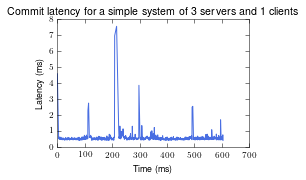

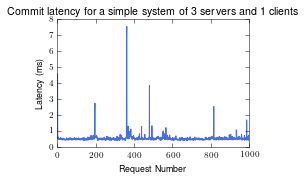

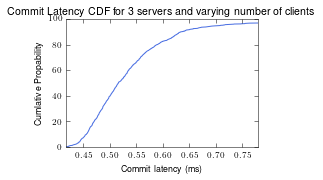

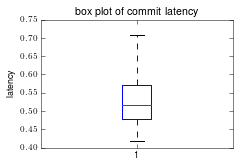

In [45]:
# SIMPLE: a simple 3 server and 1 client system

simple = read_results_file(res_dir+'simple/results/latency_1.csv')

draw_line_graph('Time (ms)', 'Latency (ms)', 'Commit latency for a simple system of 3 servers and 1 clients', 
                   simple['time'],simple['latency'])

draw_line_graph('Request Number', 'Latency (ms)', 'Commit latency for a simple system of 3 servers and 1 clients', 
                   simple['reqs'],simple['latency'])
draw_cdf('Commit latency (ms)', 
         'Commit Latency CDF for 3 servers and varying number of clients',
         simple['latency'])

draw_boxplot("latency","box plot of commit latency",simple['latency'])

In [46]:
# LOAD TESTING DATA 


clients = range(1,25)
latency = {}
latency_by_client = {}
req_by_client = {}
time_by_client = {}

for c in clients:
    latency[c]=[]
    latency_by_client[c] = {}
    req_by_client[c] = {}
    time_by_client[c] = {}
    for client in range(1,c+1):
        res = read_results_file(res_dir+'load/'+str(c)+'c/results/latency_'+str(client)+'.csv')
        latency_by_client[c][client] = res['latency']
        latency[c] = latency[c] + (res['latency'])
        req_by_client[c][client] = res['reqs']
        time_by_client[c][client] = res['time']     

/usr/local/lib/python3.4/site-packages/matplotlib/pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


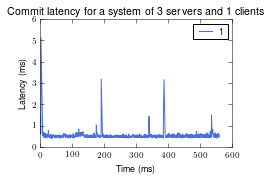

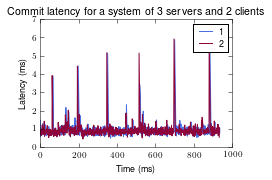

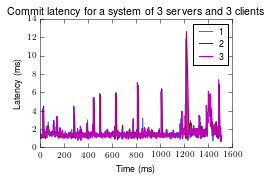

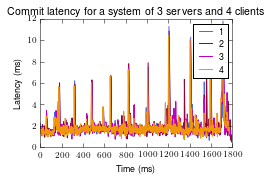

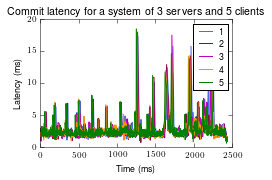

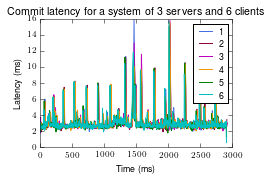

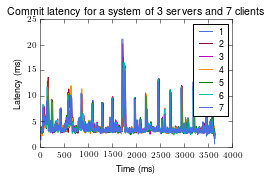

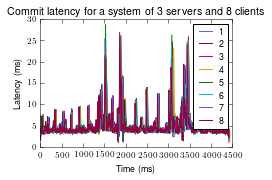

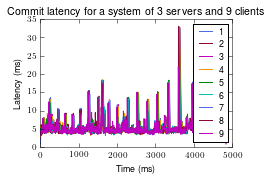

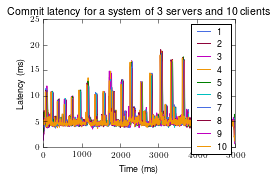

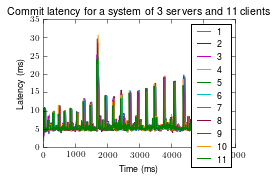

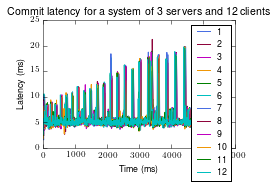

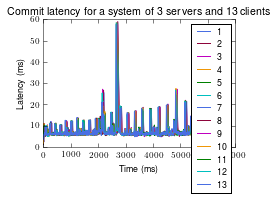

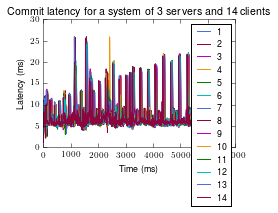

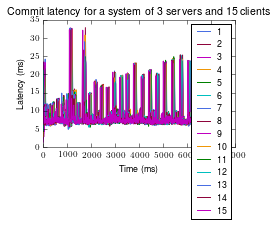

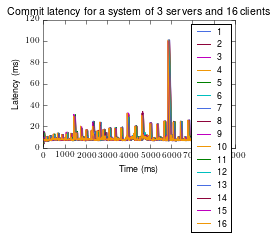

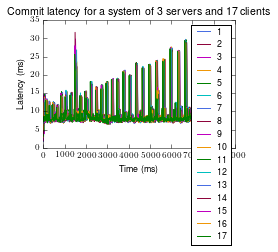

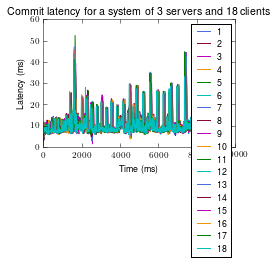

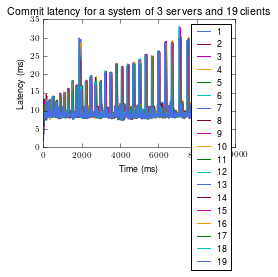

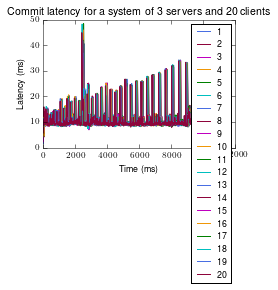

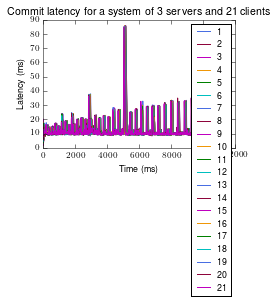

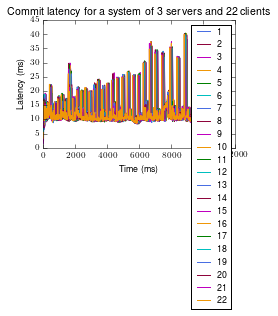

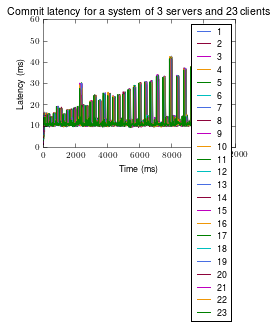

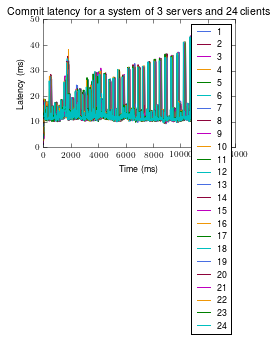

In [47]:
# plotting latency over actual time (for X client systems)

for c in clients:
    draw_lines_graph('Time (ms)', 'Latency (ms)', 'Commit latency for a system of 3 servers and '+str(c)+' clients', 
                    time_by_client[c],latency_by_client[c],range(1,c+1))



/usr/local/lib/python3.4/site-packages/matplotlib/pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


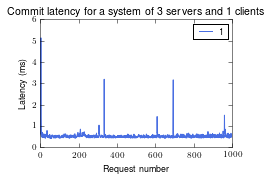

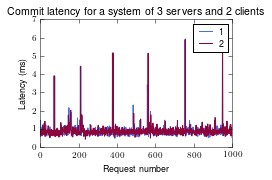

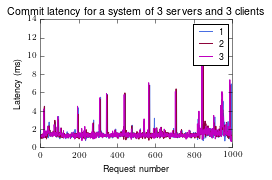

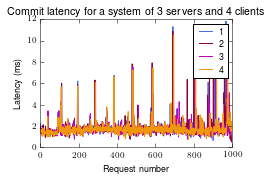

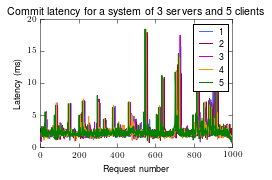

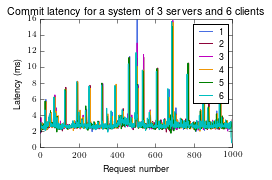

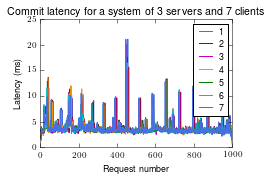

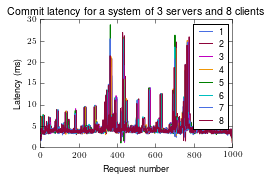

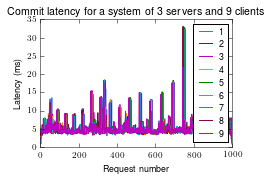

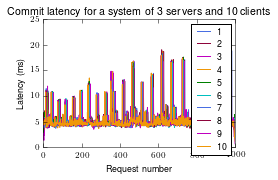

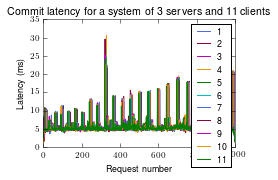

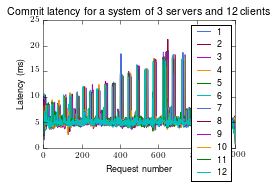

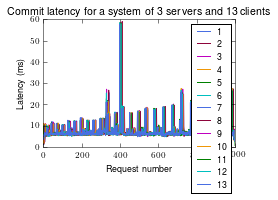

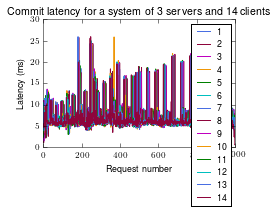

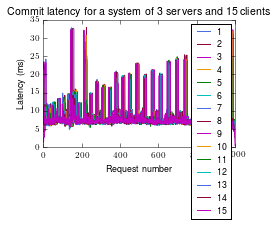

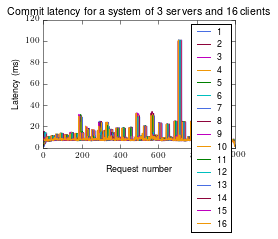

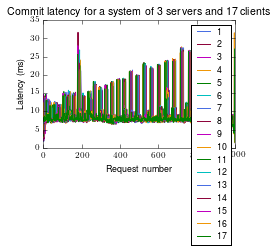

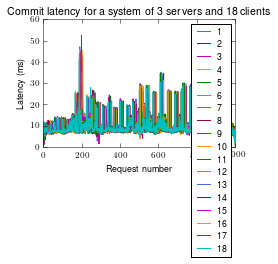

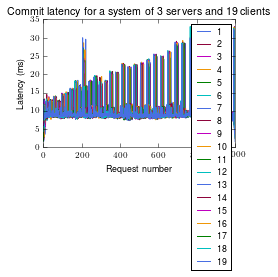

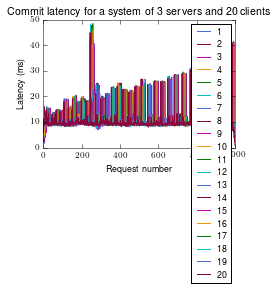

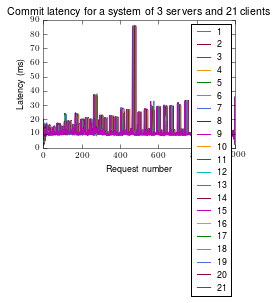

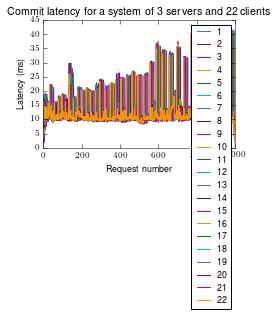

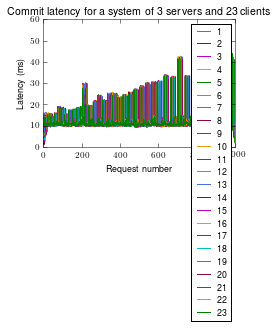

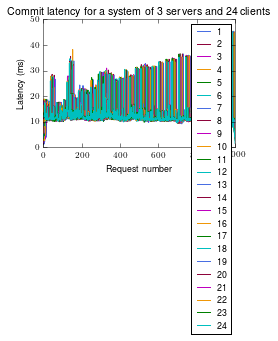

In [48]:
# plotting latency over request time (for X client system)

for c in clients:
    draw_lines_graph('Request number','Latency (ms)','Commit latency for a system of 3 servers and '+str(c)+' clients',
                    req_by_client[c], latency_by_client[c], range(1,c+1))


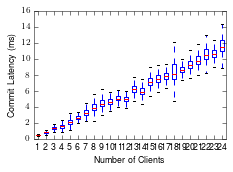

In [49]:
axes, fig = draw_boxplots("Number of Clients","Commit Latency (ms)","",latency,clients)
fig_to_file(fig,"load_latency_boxplot","pdf")

/usr/local/lib/python3.4/site-packages/matplotlib/pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


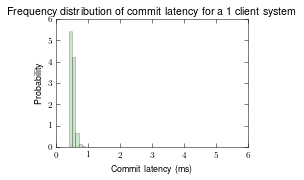

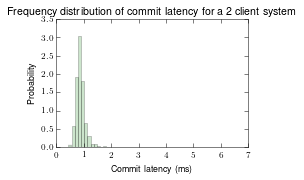

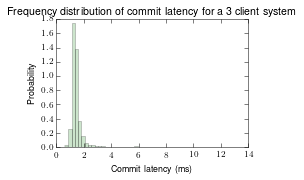

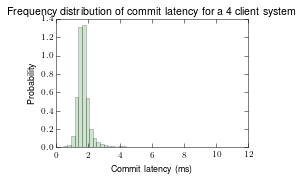

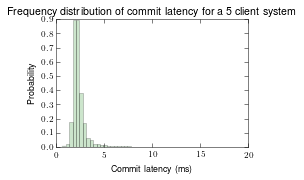

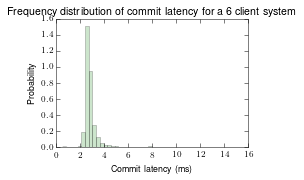

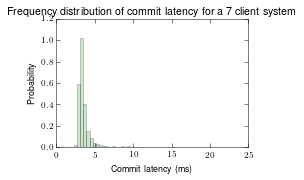

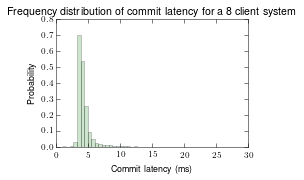

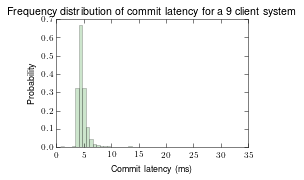

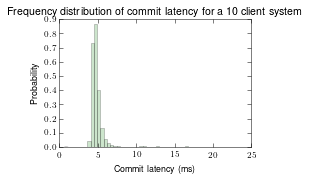

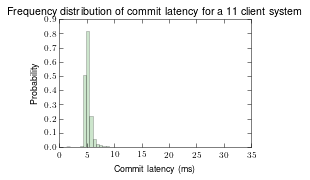

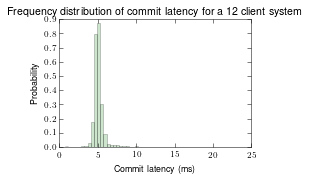

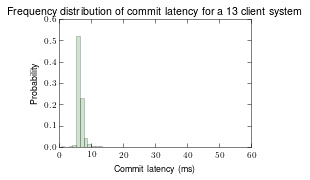

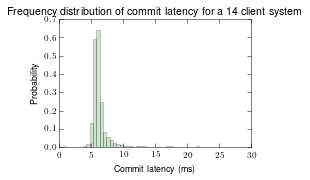

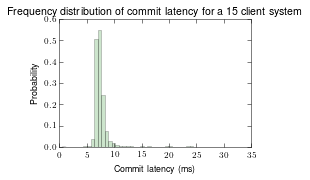

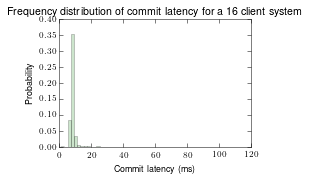

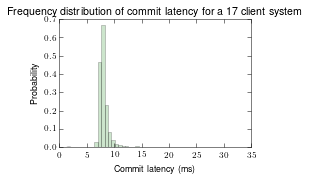

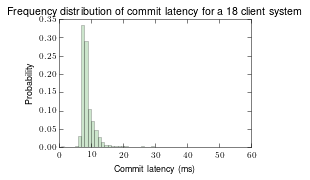

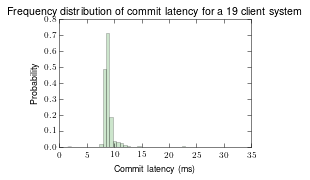

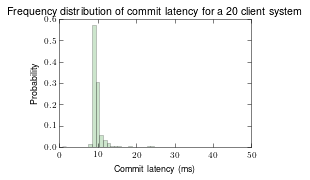

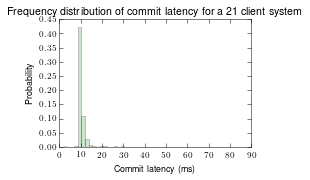

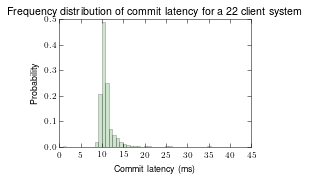

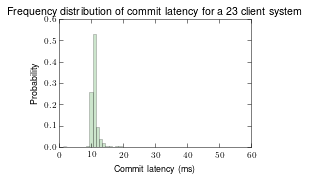

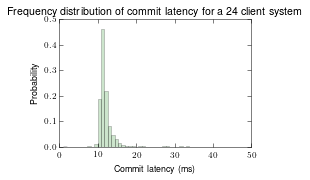

In [50]:
# plot latency distribution (for X client system)

for c in clients:
    draw_histo('Commit latency (ms)',
               'Frequency distribution of commit latency for a '+str(c)+' client system',
               latency[c],50)



(<matplotlib.axes._axes.Axes at 0x1129a96a0>,
 <matplotlib.figure.Figure at 0x110568da0>)

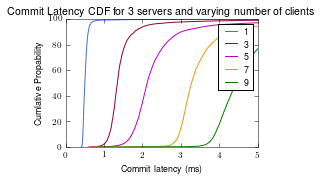

In [51]:
# plot simple CFD

draw_cdfs('Commit latency (ms)', 
         'Commit Latency CDF for 3 servers and varying number of clients',
         latency,[1,3,5,7,9])



1000 559.8557320004147
2000 935.8861959999558
3000 1511.4932970000154
4000 1795.981030999883
5000 2436.315295999975
6000 2921.1816629999703
7000 3644.082638999862
8000 4445.643730000029
9000 4855.903203000253
10000 4998.198897999828
11000 5435.301187000277
12000 5310.189232000084
13000 6795.363006999651
14000 6465.088906999881
15000 7773.536687
16000 8248.526038000002
17000 8418.285729999994
18000 9155.723686999998
19000 9291.53615300001
20000 10051.530370999999
21000 10709.836096999992
22000 11421.399508999997
23000 11432.691196999996
24000 12498.047789999986


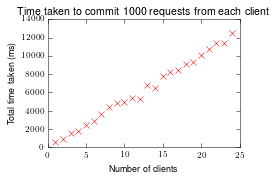

In [52]:
# calc throughput per client
throughput_by_client = {}
time_taken = []
throughput=[]

for c in clients:
    throughput_by_client[c] = {}
    reqs = 0
    time = 0
    for client in range(1,c+1):
        reqs += int(req_by_client[c][client][-1])
        new_time = time_by_client[c][client][-1]
        if new_time >time:
            time=new_time
    print(reqs,time)
    time_taken.append(time)
    throughput.append(reqs*1000/time)
    
_,fig = draw_simple_plot('Number of clients','Total time taken (ms)','Time taken to commit 1000 requests from each client',clients,time_taken)
fig_to_file(fig,"load_timetaken","pdf")

range(1, 25)
[1786.1744425245238, 2137.0119663567452, 1984.7921297132748, 2227.195015402287, 2052.279525646442, 2053.9633244986794, 1920.922408587635, 1799.5144203784291, 1853.4142102419357, 2000.7207004110592, 2023.8068915682038, 2259.8064731264194, 1913.0692483402554, 2165.476794115224, 1929.623619720623, 1939.7404974282506, 2019.4135178160568, 1965.9833144110485, 2044.871772238153, 1989.7467611203422, 1960.8143215079135, 1926.208778763419, 2011.7747959496476, 1920.2999062944075]
[0.4975485, 0.85103700000000004, 1.3432809999999999, 1.623014, 2.1223795000000001, 2.6814844999999998, 3.2784110000000002, 3.9005935000000003, 4.4457825, 4.6306189999999994, 5.0409765000000002, 4.9712514999999993, 6.2317070000000001, 5.9092184999999997, 7.1993, 7.5059955, 7.8509910000000005, 8.111713, 8.6732624999999999, 9.3056994999999993, 9.8426720000000003, 10.525605500000001, 10.630395, 11.487123]


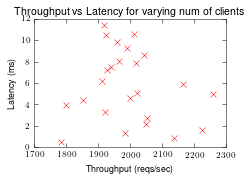

In [53]:
# plotting throughput vs latency

medium_latency=[]

for c in clients:
    medium_latency.append(np.percentile(latency[c],50))
    

draw_simple_plot('Throughput (reqs/sec)','Latency (ms)','Throughput vs Latency for varying num of clients',throughput,medium_latency)
print(clients)
print(throughput)
print(medium_latency)


(1, 14)

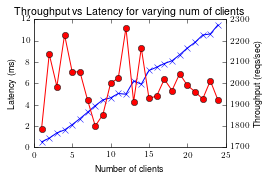

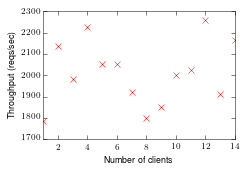

In [54]:
fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])

axes.set_xlabel('Number of clients')
axes.set_ylabel('Latency (ms)')
axes.set_title('Throughput vs Latency for varying num of clients')

axes.plot(clients, medium_latency,"bx-") 

axes2 = axes.twinx()
axes2.set_ylabel('Throughput (reqs/sec)')
axes2.plot(clients, throughput,"ro-")

axes, fig = draw_simple_plot('Number of clients','Throughput (reqs/sec)','',clients, throughput)
axes.set_xlim([1,14])


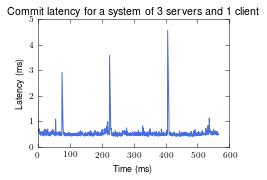

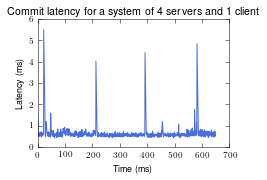

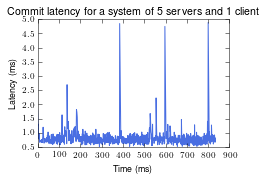

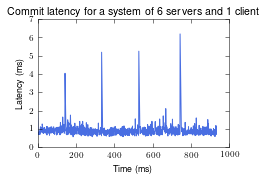

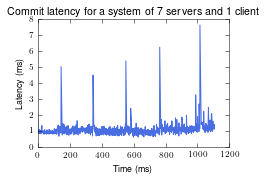

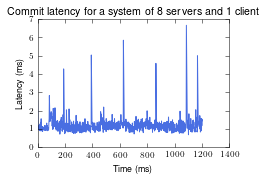

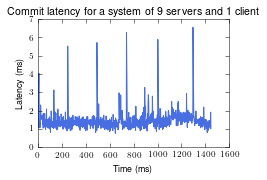

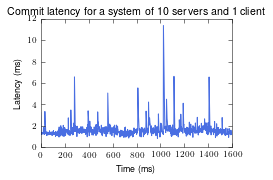

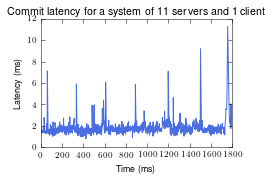

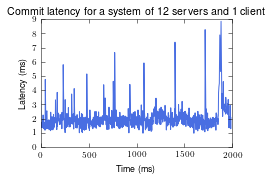

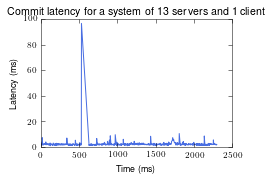

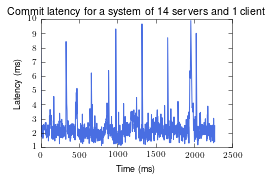

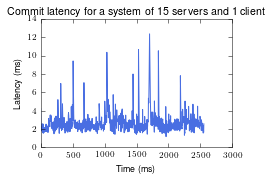

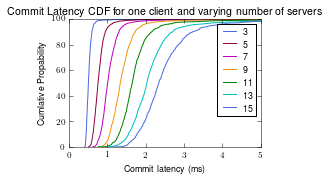

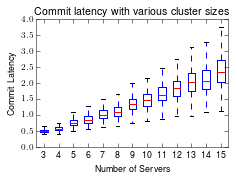

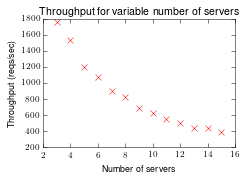

In [55]:
# SCALE: for other numbers of servers

serv_latency = {}
serv_throughput = []
servs = range(3,16)
servs_less = range(3,16,2)


for s in servs:
    scale = read_results_file(res_dir+'scale/'+str(s)+'s/results/latency_1.csv')
    serv_latency[s]= scale["latency"]
    serv_throughput.append(int(scale["reqs"][-1])*1000/scale["time"][-1])
    draw_line_graph('Time (ms)', 'Latency (ms)', 'Commit latency for a system of '+str(s)+' servers and 1 client', 
                   scale['time'],scale['latency'])
    
draw_cdfs('Commit latency (ms)','Commit Latency CDF for one client and varying number of servers',serv_latency,servs_less)

_, fig = draw_boxplots("Number of Servers","Commit Latency","Commit latency with various cluster sizes",serv_latency,servs)
fig_to_file(fig,"scale_latency_boxplot","pdf")
_, fig = draw_simple_plot("Number of servers","Throughput (reqs/sec)","Throughput for variable number of servers",servs,serv_throughput)
fig_to_file(fig,"scale_throughput","pdf")

(<matplotlib.axes._axes.Axes at 0x110608320>,
 <matplotlib.figure.Figure at 0x10f9227f0>)

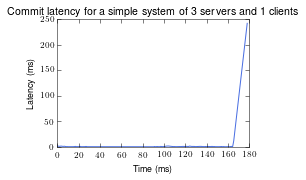

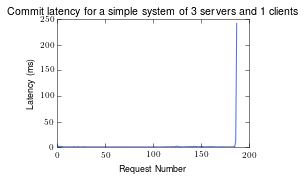

In [58]:
# FAILURE: testing master failure in a 5 node system

simple = read_results_file(res_dir+'failure/results/latency_1.csv')

axes = draw_line_graph('Time (ms)', 'Latency (ms)', 'Commit latency for a simple system of 3 servers and 1 clients', 
                   simple['time'],simple['latency'])

#axes.axvline(60,0,7)

draw_line_graph('Request Number', 'Latency (ms)', 'Commit latency for a simple system of 3 servers and 1 clients', 
                   simple['reqs'],simple['latency'])

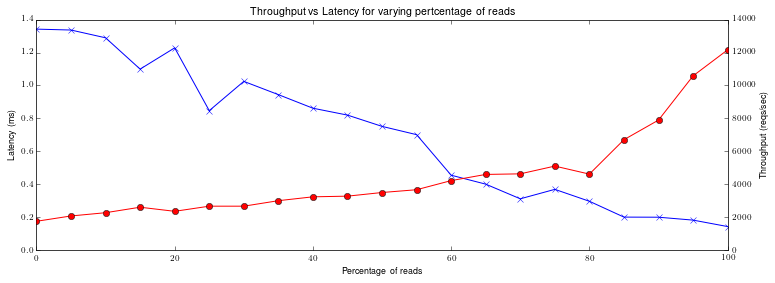

In [65]:
# READ: how does special treatment of read requests improve throughput and latency

read_latency = {}
read_time = {}

read_medium_latency=[]
read_throughput=[]

perts = range(0,101,5)

for pert in perts:
    read_latency[pert] = []
    time = 0
    reqs = 0
    for client in range(1,4):
        res = read_results_file(res_dir+'read/'+str(pert)+'r/results/latency_'+str(client)+'.csv')
        read_latency[pert] = read_latency[pert] + (res['latency'])
        if time < res['time'][-1]:
            time = res['time'][-1]
        reqs += int(res['reqs'][-1])
    read_time[pert] = res['time']   
    read_throughput.append(reqs*1000/time)
    read_medium_latency.append(np.percentile(read_latency[pert],50))
        
fig = plt.figure(figsize=[12,4])
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])

axes.set_xlabel('Percentage of reads')
axes.set_ylabel('Latency (ms)')
axes.set_title('Throughput vs Latency for varying pertcentage of reads')

axes.plot(perts, read_medium_latency,"bx-") 

axes2 = axes.twinx()
axes2.set_ylabel('Throughput (reqs/sec)')
axes2.plot(perts, read_throughput,"ro-") 
 

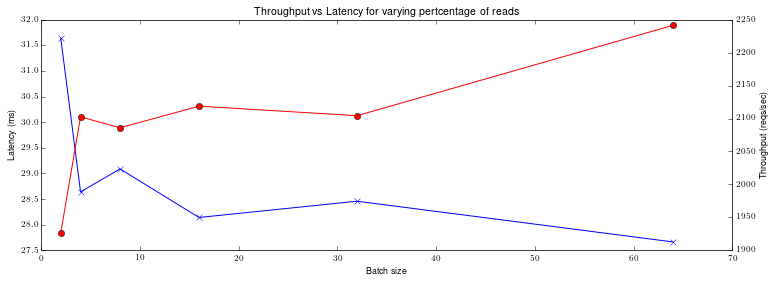

In [60]:
# BATCH: how does batching improve throughput

def batch():
    latency = {}
    time = {}

    medium_latency=[]
    throughput=[]

    var = list(map(lambda x : power(2,x),range(1,7)))

    for v in var:
        latency[v] = []
        time[v] = []
        throughput_per_client = []
        for c in range(1,64+1):
            res = read_results_file(res_dir+'batch/'+str(v)+'r/results/latency_'+str(c)+'.csv')
            latency[v] = latency[v] + res['latency']
            time[v] = time[v] + res['time']
            throughput_per_client.append(latency_to_throughput(res['latency']))
        throughput.append(sum(throughput_per_client))
        medium_latency.append(np.percentile(latency[v],50))

    fig = plt.figure(figsize=[12,4])
    axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])

    axes.set_xlabel('Batch size')
    axes.set_ylabel('Latency (ms)')
    axes.set_title('Throughput vs Latency for varying pertcentage of reads')

    axes.plot(var, medium_latency,"bx-") 

    axes2 = axes.twinx()
    axes2.set_ylabel('Throughput (reqs/sec)')
    axes2.plot(var, throughput,"ro-") 
 
batch()